In [ ]:
import numpy as np
!pip install --upgrade matplotlib==3.4.2 #needed for value labeling in the graph
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# ======== Data for Calibration ======== #

# ==== Some reference links ==== #
"""
Japan, Korea: https://www.oecd.org/employment/emp/average-effective-age-of-retirement.htm
China: https://www.economist.com/china/2021/06/22/chinas-average-retirement-age-is-ridiculously-low-54
Social security: https://www.ssa.gov/policy/docs/progdesc/ssptw/2018-2019/asia/index.html
"""

# ==== Extract simulation data ==== #
## --- population data 
data1 = pd.read_csv('https://population.un.org/wpp/Download/Files/1_Indicators%20(Standard)/CSV_FILES/WPP2019_PopulationByAgeSex_Medium.csv')
data1_var = pd.read_csv('https://population.un.org/wpp2019/Download/Files/1_Indicators%20(Standard)/CSV_FILES/WPP2019_PopulationByAgeSex_OtherVariants.csv')
## --- Life expectancy data
data2 = pd.read_csv('https://raw.githubusercontent.com/thanhqtran/macroeconomics-research/main/Database/life-expectancy-at-birth-including-the-un-projections.csv')
"""source: 'https://ourworldindata.org/grapher/life-expectancy-at-birth-including-the-un-projections?country=OWID_WRL~BRA~IND~SWE~JPN'"""
## --- HDR data
url_myos = 'http://hdr.undp.org/en/indicators/103006#' #mean years of schooling
url_eyos = 'http://hdr.undp.org/en/indicators/69706' #expected years of schooling
## --- macroeconomic data
data5 = pd.read_csv('https://raw.githubusercontent.com/thanhqtran/macroeconomics-research/main/Database/pwt/pwt10_raw.csv')
"""source: 'https://www.rug.nl/ggdc/productivity/pwt/?lang=en'"""

# ==== Data Cleaning ==== #

def create_pop_data(data):
    df_data = pd.DataFrame(data).reset_index()
    old = ['55-59','60-64''65-69','70-74','75-79','80-84','85-89','90-94','95-99','100+']
    young = ['20-24','25-29','30-34','35-39','40-44','45-49','50-54']

    # original data (medium fertility)
    #filter old pop
    df_data_o = df_data.loc[df_data['AgeGrp'].isin(old)]
    df_data_old = df_data_o.groupby(['Time']).sum()

    #filer young pop
    df_data_y = df_data.loc[df_data['AgeGrp'].isin(young)]
    df_data_young = df_data_y.groupby(['Time']).sum()

    #total pop
    df_data2 = df_data.groupby(['Time']).sum()

    #add young and old to total pop
    df_data2['PopOld'] = df_data_old['PopTotal']
    df_data2['PopYoung'] = df_data_young['PopTotal']
    df_data2['OldAgeDep'] = df_data2['PopOld'] / df_data2['PopTotal'] * 100
    df_data2['AbOldAgeDep'] = df_data2['PopOld'] / df_data2['PopYoung'] * 100
    df_data2['YoungAgeRatio'] = df_data2['PopYoung'] / df_data2['PopTotal'] * 100
    df_data2['PopYoungGrowth'] = df_data2['PopYoung'].pct_change()
    df_data2['PopGrowth'] = df_data2['PopTotal'].pct_change()
    df_data2['PopGrowth35'] = df_data2['PopTotal'].pct_change(periods = 35)
    df_data2['PopYoungGrowth35'] = df_data2['PopYoung'].pct_change(periods = 35)
    df_data2['PopYoungGrowth35yearly'] = (df_data2['PopYoungGrowth35'] + 1)**(1/35) - 1
    return df_data2.reset_index()
    

def merge_data(data1, data2):
    data2.columns = ['Country','Code','Time','Lexp','Lexp_est']
    data2.loc[data2['Lexp'].isna(),'Lexp'] = data2.loc[data2['Lexp_est'].notna(),'Lexp_est']
    new_data = pd.merge(data1, data2, on = ['Time'], how = 'left')
    return new_data

#filter countries
df = pd.DataFrame(data1) #pop growth
df_var = pd.DataFrame(data1_var) #pop growth variations
df2 = pd.DataFrame(data2) #life expectancy

# for pop growth
vn_pop = create_pop_data(df[df['Location'] == 'Viet Nam'])
tl_pop = create_pop_data(df[df['Location'] == 'Thailand'])
ml_pop = create_pop_data(df[df['Location'] == 'Malaysia'])
pl_pop = create_pop_data(df[df['Location'] == 'Philippines'])
cn_pop = create_pop_data(df[df['Location'] == 'China'])
kr_pop = create_pop_data(df[df['Location'] == "Republic of Korea"])
jp_pop = create_pop_data(df[df['Location'] == "Japan"])
lk_pop = create_pop_data(df[df['Location'] == "Sri Lanka"])
id_pop = create_pop_data(df[df['Location'] == 'India'])
# for life expectancy
vn_life = df2[df2['Entity'] == 'Vietnam']
tl_life = df2[df2['Entity'] == 'Thailand']
ml_life = df2[df2['Entity'] == 'Malaysia']
pl_life = df2[df2['Entity'] == 'Philippines']
cn_life = df2[df2['Entity'] == 'China']
kr_life = df2[df2['Entity'] == "South Korea"]
jp_life = df2[df2['Entity'] == "Japan"]
lk_life = df2[df2['Entity'] == "Sri Lanka"]
id_life = df2[df2['Entity'] == 'India']
# merge to make demographic data
vn_demo = merge_data(vn_pop, vn_life)
tl_demo = merge_data(tl_pop, tl_life)
ml_demo = merge_data(ml_pop, ml_life)
pl_demo = merge_data(pl_pop, pl_life)
cn_demo = merge_data(cn_pop, cn_life)
kr_demo = merge_data(kr_pop, kr_life)
jp_demo = merge_data(jp_pop, jp_life)
lk_demo = merge_data(lk_pop, lk_life)
id_demo = merge_data(id_pop, id_life)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [ ]:
# ==== Model Specification ==== #
class Model():
    # some global variables
    def __init__(self, country, labsh, delta, tau, yos, expected_yos, n_annual, life_exp, category, n_annual_forecast, life_forecast, leisure):
        #country-specific parameters
        self.E = 1
        self.N_ss = 1
        self.country = str(country)
        self.leisure = leisure
        self.labsh = labsh
        self.delta = delta
        self.tau = tau #change here to create a tax shock
        self.tau_ss = tau
        self.yos = yos
        self.eyos = expected_yos
        self.n_annual = n_annual
        self.life_exp_ss = life_exp
        # shared parameters 
        self.beta_annual = 0.99
        self.T = 35
        self.beta = self.beta_annual**self.T
        self.life_max = 20 + self.T*2
        self.life_p1 = 20 + self.T
        self.gamma = self.leisure*self.beta #Kitao(2014)
        self.alpha = 1 - self.labsh #capital share
        self.g_annual = 0.075-self.delta
        self.g = (1+self.g_annual)**self.T - 1 #tech frontier
        self.phi = 0.1 #returns to education
        # exo parameters 
        self.n_ss = (1+n_annual)**self.T - 1
        self.pi_ss = (self.life_exp_ss - self.life_p1)/(self.life_max - self.life_p1)
        self.eta = self.yos*0.5/15 + self.eyos*0.5/18
        self.e = np.exp(self.phi*self.yos) #returns to education factor
        self.epsilon_ss = self.pi_ss**(1-self.eta)
        # experiment specification
        self.n_annual_forecast = n_annual_forecast
        self.life_forecast = life_forecast
        self.n_change = self.n_annual - self.n_annual_forecast #shock_n
        self.life_change_baseline = self.life_forecast - self.life_exp_ss #shock_life_exp
        self.category = str(category)
        #category list: early, late, post-demographic dividend (World Bank database)
        if category == 'early':
            x = 2.5
        elif category == 'late':
            x = 2
        elif category == 'post':
            x = 1
        else:
            x = 0
        self.non_aging = [0, self.n_change]
        self.moderate_aging = [self.life_change_baseline, self.n_change]
        self.slow_aging = [self.life_change_baseline - x, self.n_change]
        self.fast_aging = [self.life_change_baseline + x, self.n_change]
        # a dictionary to store the results
        self.model_dict = {}
        # demo shocks simulation specification (life_change, n_change)
        self.model1 = self.simulation(self.slow_aging[0], self.slow_aging[1])
        self.model2 = self.simulation(self.moderate_aging[0], self.moderate_aging[1])
        self.model3 = self.simulation(self.fast_aging[0], self.fast_aging[1])
        self.model4 = self.simulation(self.non_aging[0], self.non_aging[1])
        # printtest
        #print(f'{self.country} \n tech growth {round(self.g,2)},\n education {round(self.eta,2)},\n old productivity {round(self.epsilon_ss,2)},\n returns to edu {round(self.e,2)},\n init_n {round(self.n_ss,2)},\n ini_lifeexp {round(self.life_exp_ss,2)},\n ini_survival {round(self.pi_ss,2)}, \n forecast_n {round((1+self.n_annual_forecast)**self.T-1,2)}, \n slow {self.life_change_baseline-x} fast {self.life_change_baseline+x} \n forecast_lifeexp {round(self.life_forecast,2)}')

    # to update parameters when shocks occur
    def update_parameter(self, shock_life_exp=0, shock_n=0):
        life_exp = self.life_exp_ss + shock_life_exp
        n = (1+self.n_annual - shock_n)**self.T - 1
        pi_raw = (life_exp - self.life_p1)/(self.life_max - self.life_p1)
        tau = self.tau
        if pi_raw > 1:
            pi = 1
        else:
            pi = pi_raw
        epsilon = pi**(1-self.eta)
        return n, pi, epsilon, tau

    # to find retirement decision
    def find_lkMul(self, n, pi, epsilon, tau, N):
        l_raw = ((1-tau)*((1+n)*self.alpha+pi*epsilon)*self.gamma+(1+n+pi*epsilon)*((1-self.alpha)*self.beta+self.gamma)*tau)/(pi*epsilon*((1-self.alpha)*self.beta+self.gamma))
        if l_raw >= 1:
            l = 1
            kMultiplier = ((1-tau)*(1-self.alpha)*self.alpha*self.beta*pi)/((1+n)*(1+self.g)*((1+self.beta*pi)*self.alpha+(1-self.alpha)*tau))
        else:
            l = l_raw
            kMultiplier = (pi*self.alpha*((1-self.alpha)*self.beta+self.gamma))/((1+self.g)*((1+n)*(1+pi*self.beta+pi*self.gamma)*self.alpha + pi*epsilon*(1+pi*self.beta*self.alpha)))
        L = ((1+(1-l_raw)*pi*epsilon)/(1+n))*N
        return l, kMultiplier, L
    
    # to find the steady states
    def find_kl_ss(self):
        l_ss, kMultiplier_ss, L_ss = self.find_lkMul(n=self.n_ss, pi=self.pi_ss, epsilon=self.epsilon_ss, tau=self.tau_ss, N=self.N_ss)
        k_ss = kMultiplier_ss**(1/(1-self.alpha))
        return l_ss, k_ss, L_ss
    
    # find other tech-adjusted variables from k and l
    def find_var(self, k, l, L, n, pi, epsilon):
        y = k**self.alpha #output
        A = self.E*(1+self.g)*self.e
        k_pc = k*A #capital per capita
        r = self.alpha*(k**(self.alpha-1)) #interest rate
        r1 = (np.exp(np.log(r)/self.T) - 1)*100 #annualized interest rate
        w = (1-self.alpha)*(k**self.alpha) #wage
        s = (1+n+(1-l)*pi*epsilon)*(1+self.g)*k #saving
        p = (self.tau*w*(1+n+(1-l)*pi*epsilon))/(pi*l) #pension
        c = ((1-self.tau)*w - s) #consumption
        d = r*s/pi + (1-l)*(1-self.tau)*epsilon*w + p*l #dissave
        dep_n = pi/(1+n) #biological dependency rate
        dep_t = 1+n+pi*epsilon*(1-l) #dependency rate retired/workers
        u_tilde = np.log(c) + pi*self.beta*np.log(d*(1+self.g)) + pi*self.gamma*np.log(l) #total utility
        u_c = np.log(c*A) # consumption utility 
        u_d = pi*self.beta*np.log(d*A) #dissave utility
        u_l = pi*self.gamma*np.log(l) #retirement utility
        u_total = u_c + u_d + u_l 
        retire = self.life_p1+(1-l)*self.T #retirement age
        return y, r1, w, s, p, c, d, dep_n, dep_t, u_tilde, u_c, u_d, u_l, u_total, retire, k_pc

    # model dynamics 
    def model_dynamics(self, shock_life_exp=0, shock_n=0):
        # find steady-state (no shock) as init. value #
        l_ss, k_ss, L_ss = self.find_kl_ss()
        y_ss, r_ss, w_ss, s_ss, p_ss, c_ss, d_ss, dep_n_ss, dep_t_ss, u_tilde_ss, u_c_ss, u_d_ss, u_l_ss, u_total_ss, retire_ss, k_pc = self.find_var(k=k_ss, l=l_ss, L=L_ss, n=self.n_ss, pi=self.pi_ss, epsilon=self.epsilon_ss)
        # generate lists of output #
        t_hist = [0]; k_hist = [k_ss]; l_hist = [l_ss]
        y_hist = [y_ss]; r_hist = [r_ss]; w_hist = [w_ss]; s_hist = [s_ss]; p_hist = [p_ss]; c_hist = [c_ss]; d_hist = [d_ss]
        dep_n_hist = [dep_n_ss]; dep_t_hist = [dep_t_ss]; u_tilde_hist = [u_tilde_ss]; Uc_hist = [u_c_ss]; Ud_hist = [u_d_ss]; Ul_hist = [u_l_ss]; U_total_hist = [u_total_ss];retire_hist = [retire_ss]; kgrowth_hist = [0]; k_pc_hist = [k_pc]
        # update parameters after shocks #
        n, pi, epsilon, tau = self.update_parameter(shock_life_exp, shock_n)
        # transient dynamics #
        N = self.N_ss*(1+n)
        l, kMultiplier, L = self.find_lkMul(n, pi, epsilon, tau, N)
        k_old = k_ss #assume the initial value of k is at the steady-state value
        # term to valuate after each iteration
        kerror = 1
        t = 1
        # iterate until convergence #
        while (t < 11) or (kerror > 0.01):
            k = kMultiplier*(k_old**self.alpha)
            y, r, w, s, p, c, d, dep_n, dep_t, u_tilde, u_c, u_d, u_l, u_total, retire, k_pc = self.find_var(k, l, L, n, pi, epsilon)
            # add back to output list
            t_hist.append(t); k_hist.append(k); l_hist.append(l)
            y_hist.append(y); r_hist.append(r); w_hist.append(w); s_hist.append(s); p_hist.append(p*(1+self.g)); c_hist.append(c); d_hist.append(d)
            dep_n_hist.append(dep_n); dep_t_hist.append(dep_t); u_tilde_hist.append(u_tilde); Uc_hist.append(u_c); Ud_hist.append(u_d); Ul_hist.append(u_l); U_total_hist.append(u_total); retire_hist.append(retire)
            k_pc_hist.append(k_pc)
            # revaluate k diff.
            kerror = abs(k - k_old)
            kgrowth = k/k_old - 1
            kgrowth_hist.append(kgrowth)
            # update capital stock
            k_old = k
            t = t + 1
        return t_hist, l_hist, k_hist, y_hist, r_hist, w_hist, s_hist, p_hist, c_hist, d_hist, dep_n_hist, dep_t_hist, u_tilde_hist, retire_hist, u_tilde_hist, Uc_hist, Ud_hist, Ul_hist, U_total_hist, kgrowth_hist, k_pc_hist
        
    # simulation 
    def simulation(self, shock_life_exp=0, shock_n=0):
        t_hist, l_hist, k_hist, y_hist, r_hist, w_hist, s_hist, p_hist, c_hist, d_hist, dep_n_hist, dep_t_hist, u_tilde_hist, retire_hist, u_tilde_hist, Uc_hist, Ud_hist, Ul_hist, U_total_hist, kgrowth_hist, k_pc_hist = self.model_dynamics(shock_life_exp, shock_n)
        self.model_dict['model'+'('+str(shock_life_exp)+','+str(shock_n)+')'] = []
        self.model_dict['model'+'('+str(shock_life_exp)+','+str(shock_n)+')'].append(
            {
                't_hist': t_hist,
                'k_hist': k_hist,
                'l_hist': l_hist,
                'y_hist': y_hist,
                'r_hist': r_hist,
                'w_hist': w_hist,
                's_hist': s_hist,
                'p_hist': p_hist,
                'c_hist': c_hist,
                'd_hist': d_hist,
                'dep_n_hist': dep_n_hist,
                'dep_t_hist': dep_t_hist,
                'u_tilde_hist': u_tilde_hist,
                'Uc_hist': Uc_hist,
                'Ud_hist': Ud_hist,
                'Ul_hist': Ul_hist,
                'U_total_hist': U_total_hist,
                'retire_hist': retire_hist,
                'kgrowth_hist': kgrowth_hist,
                'k_pc_hist': k_pc_hist
            }
        )

    # get the name of the model 
    def get_model_name(self, aging_shock_type):
        shock_life_exp = aging_shock_type[0]
        shock_n = aging_shock_type[1]
        name = 'model'+'('+str(shock_life_exp)+','+str(shock_n)+')'
        return name

In [ ]:
# ======= Simulation ======= #
# Order: labsh, delta (PWT), tau (ISSA), yos, expected_yos (HDR), n_annual, life_exp, category, n_annual_forecast, life_forecast (UN)

baseyear = 2019
forecastyear = baseyear + 35

# --- Vietnam
vn = Model(
    'vn', 0.802, 0.053945646, 0.22, 8.3, 12.96, 
    vn_demo[vn_demo['Time'] == baseyear]['PopYoungGrowth35yearly'].values[0], 
    vn_demo[vn_demo['Time'] == baseyear]['Lexp'].values[0], 
    'late', 
    vn_demo[vn_demo['Time'] == forecastyear]['PopYoungGrowth35yearly'].values[0],
    vn_demo[vn_demo['Time'] == forecastyear]['Lexp'].values[0],
    0.36
    )

vn_nopension = Model(
    'vn', 0.802, 0.053945646, 0, 8.3, 12.96, 
    vn_demo[vn_demo['Time'] == baseyear]['PopYoungGrowth35yearly'].values[0], 
    vn_demo[vn_demo['Time'] == baseyear]['Lexp'].values[0], 
    'late', 
    vn_demo[vn_demo['Time'] == forecastyear]['PopYoungGrowth35yearly'].values[0],
    vn_demo[vn_demo['Time'] == forecastyear]['Lexp'].values[0],
    0.36
    )

# --- Sri Lanka
lk = Model(
    'lk', 0.8606, 0.064793095, 0.2, 10.6, 14.1,
    lk_demo[lk_demo['Time'] == baseyear]['PopYoungGrowth35yearly'].values[0], 
    lk_demo[lk_demo['Time'] == baseyear]['Lexp'].values[0], 
    'late', 
    lk_demo[lk_demo['Time'] == forecastyear]['PopYoungGrowth35yearly'].values[0],
    lk_demo[lk_demo['Time'] == forecastyear]['Lexp'].values[0],
    0.36
)
# --- Thailand
tl = Model(
    'tl', 0.7820, 0.062987238, 0.07, 7.9, 15, 
    tl_demo[tl_demo['Time'] == baseyear]['PopYoungGrowth35yearly'].values[0], 
    tl_demo[tl_demo['Time'] == baseyear]['Lexp'].values[0], 
    'post', 
    tl_demo[tl_demo['Time'] == forecastyear]['PopYoungGrowth35yearly'].values[0],
    tl_demo[tl_demo['Time'] == forecastyear]['Lexp'].values[0],
    0.46
    )
# --- China
cn = Model(
    'cn', 0.59, 0.051894568, 0.28, 8.1, 14, 
    cn_demo[cn_demo['Time'] == baseyear]['PopYoungGrowth35yearly'].values[0], 
    cn_demo[cn_demo['Time'] == baseyear]['Lexp'].values[0], 
    'post', 
    cn_demo[cn_demo['Time'] == forecastyear]['PopYoungGrowth35yearly'].values[0],
    cn_demo[cn_demo['Time'] == forecastyear]['Lexp'].values[0], 
    0.36
    )
# --- South Korea
kr = Model(
    'kr', 0.9014, 0.051903997, 0.09, 12.2, 16.5, 
    kr_demo[kr_demo['Time'] == baseyear]['PopYoungGrowth35yearly'].values[0], 
    kr_demo[kr_demo['Time'] == baseyear]['Lexp'].values[0], 
    'post', 
    kr_demo[kr_demo['Time'] == forecastyear]['PopYoungGrowth35yearly'].values[0],
    kr_demo[kr_demo['Time'] == forecastyear]['Lexp'].values[0],
    0.3
    )
# --- Japan
jp = Model(
    'jp', 0.7982, 0.042308975, 0.183, 12.8, 15.2, 
    jp_demo[jp_demo['Time'] == baseyear]['PopYoungGrowth35yearly'].values[0], 
    jp_demo[jp_demo['Time'] == baseyear]['Lexp'].values[0], 
    'post', 
    jp_demo[jp_demo['Time'] == forecastyear]['PopYoungGrowth35yearly'].values[0],
    jp_demo[jp_demo['Time'] == forecastyear]['Lexp'].values[0],
    0.21
    )

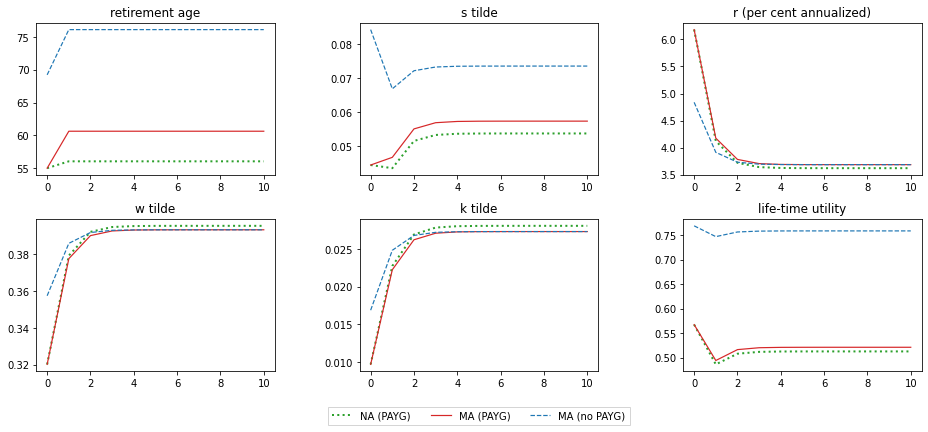

In [ ]:
# ==== Simul: Dynamics of variables ====
## inspected variables
var0 = 'retire_hist'
var1 = 's_hist'
var2 = 'r_hist'
var3 = 'w_hist'
var4 = 'k_hist'
var5 = 'U_total_hist'
## country of interest
country = vn
country_nopension = vn_nopension

## plotting
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(13,6))
x = country.model_dict[country.get_model_name(country.moderate_aging)][0].get('t_hist')

axs_list = [[0,0],[0,1],[0,2],[1,0],[1,1],[1,2]]
var_list = [var0, var1, var2, var3, var4, var5]
var_name_list = ['retirement age','s tilde','r (per cent annualized)','w tilde','k tilde','life-time utility']
for i in range(6):
    axs[axs_list[i][0],axs_list[i][1]].plot(x, country.model_dict[country.get_model_name(country.non_aging)][0].get(var_list[i]), 'tab:green',linewidth=2, ls=':', label='tilde'+str(var_list[i]))
    axs[axs_list[i][0],axs_list[i][1]].plot(x, country.model_dict[country.get_model_name(country.moderate_aging)][0].get(var_list[i]), 'tab:red',linewidth=1.2, label='tilde'+str(var_list[i]))
    axs[axs_list[i][0],axs_list[i][1]].plot(x, country_nopension.model_dict[country_nopension.get_model_name(country_nopension.moderate_aging)][0].get(var_list[i]), 'tab:blue', ls='--',linewidth=1.2, label='tilde'+str(var_list[i]))
    axs[axs_list[i][0],axs_list[i][1]].set_title(var_name_list[i])

fig.subplots_adjust(bottom=0.3, wspace=0.33)

axs[1,1].legend(labels=['NA (PAYG)','MA (PAYG)','MA (no PAYG)'],loc='upper center', bbox_to_anchor=(0.5, -0.2),fancybox=False, shadow=False, ncol=3)

fig.tight_layout()

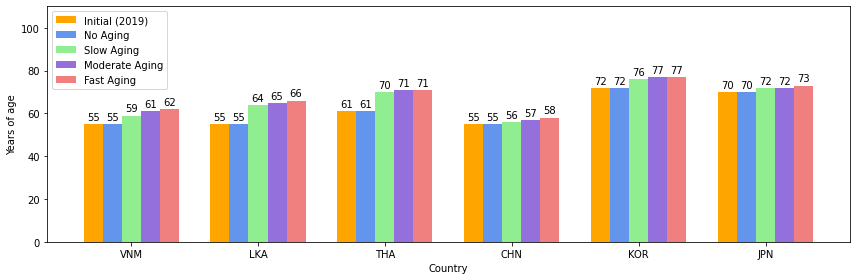

In [ ]:
# ==== Simul: Retirement age ====
var = 'retire_hist'
labels = ['VNM','LKA','THA','CHN','KOR','JPN']
# --- slow aging
slow = [
    round(vn.model_dict[vn.get_model_name(vn.slow_aging)][0].get(str(var))[1]),
    round(lk.model_dict[lk.get_model_name(lk.slow_aging)][0].get(str(var))[1]),
    round(tl.model_dict[tl.get_model_name(tl.slow_aging)][0].get(str(var))[1]),
    round(cn.model_dict[cn.get_model_name(cn.slow_aging)][0].get(str(var))[1]),
    round(kr.model_dict[kr.get_model_name(kr.slow_aging)][0].get(str(var))[1]),
    round(jp.model_dict[jp.get_model_name(jp.slow_aging)][0].get(str(var))[1])
]
# --- moderate aging (benchmark)
moderate = [
    round(vn.model_dict[vn.get_model_name(vn.moderate_aging)][0].get(str(var))[1]),
    round(lk.model_dict[lk.get_model_name(lk.moderate_aging)][0].get(str(var))[1]),
    round(tl.model_dict[tl.get_model_name(tl.moderate_aging)][0].get(str(var))[1]),
    round(cn.model_dict[cn.get_model_name(cn.moderate_aging)][0].get(str(var))[1]),
    round(kr.model_dict[kr.get_model_name(kr.moderate_aging)][0].get(str(var))[1]),
    round(jp.model_dict[jp.get_model_name(jp.moderate_aging)][0].get(str(var))[1])
]
# --- fast aging
fast = [
    round(vn.model_dict[vn.get_model_name(vn.fast_aging)][0].get(str(var))[1]),
    round(lk.model_dict[lk.get_model_name(lk.fast_aging)][0].get(str(var))[1]),
    round(tl.model_dict[tl.get_model_name(tl.fast_aging)][0].get(str(var))[1]),
    round(cn.model_dict[cn.get_model_name(cn.fast_aging)][0].get(str(var))[1]),
    round(kr.model_dict[kr.get_model_name(kr.fast_aging)][0].get(str(var))[1]),
    round(jp.model_dict[jp.get_model_name(jp.fast_aging)][0].get(str(var))[1])
]
# --- initial value (2019)
initial = [
    round(vn.model_dict[vn.get_model_name(vn.moderate_aging)][0].get(str(var))[0]),
    round(lk.model_dict[lk.get_model_name(lk.moderate_aging)][0].get(str(var))[0]),
    round(tl.model_dict[tl.get_model_name(tl.moderate_aging)][0].get(str(var))[0]),
    round(cn.model_dict[cn.get_model_name(cn.moderate_aging)][0].get(str(var))[0]),
    round(kr.model_dict[kr.get_model_name(kr.moderate_aging)][0].get(str(var))[0]),
    round(jp.model_dict[jp.get_model_name(jp.moderate_aging)][0].get(str(var))[0])
]
# --- no aging
no_aging = [
    round(vn.model_dict[vn.get_model_name(vn.non_aging)][0].get(str(var))[0]),
    round(lk.model_dict[lk.get_model_name(lk.non_aging)][0].get(str(var))[0]),
    round(tl.model_dict[tl.get_model_name(tl.non_aging)][0].get(str(var))[0]),
    round(cn.model_dict[cn.get_model_name(cn.non_aging)][0].get(str(var))[0]),
    round(kr.model_dict[kr.get_model_name(kr.non_aging)][0].get(str(var))[0]),
    round(jp.model_dict[jp.get_model_name(jp.non_aging)][0].get(str(var))[0])
]

## Plotting
x = np.arange(len(labels))  # the label locations
width = 0.15

fig, ax = plt.subplots(figsize = (12,4))
rects0 = ax.bar(x-0.3, initial, width, label='Initial (2019)', color='orange')
rects1 = ax.bar(x-0.15, no_aging, width, label='No Aging',color='cornflowerblue')
rects2 = ax.bar(x, slow, width, label='Slow Aging', color='lightgreen')
rects3 = ax.bar(x+0.15, moderate, width, label='Moderate Aging',color='mediumpurple')
rects4 = ax.bar(x+0.3, fast, width, label='Fast Aging',color='lightcoral')

ax.set_xlabel('Country')
ax.set_ylabel('Years of age')
#ax.set_title('Desired Retirement towards 2054')
ax.set_ylim(0, 110)
ax.set_xticks(x)
ax.set_xticklabels(labels)
#put legend to the top left
ax.legend(loc='upper left')
ax.bar_label(rects0, padding=2)
ax.bar_label(rects1, padding=2)
ax.bar_label(rects2, padding=2)
ax.bar_label(rects3, padding=2)
ax.bar_label(rects4, padding=2)
fig.tight_layout()

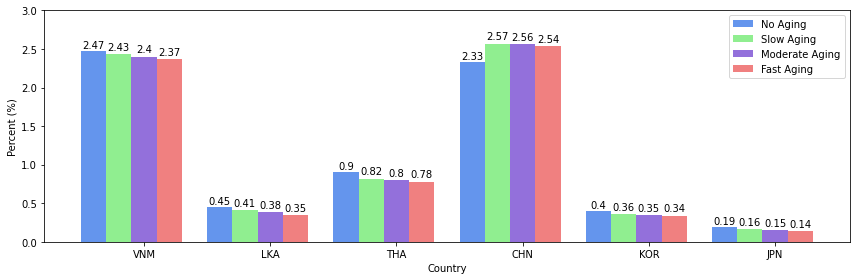

In [ ]:
# ==== Simul: Growth rate of Capital per eff. skilled. labor ====
variable = 'k_hist'
labels = ['VNM','LKA','THA','CHN','KOR','JPN']

def cal_gktilde(country):
    sa = country.model_dict[country.get_model_name(country.slow_aging)][0].get(str(variable))[1]/country.model_dict[country.get_model_name(country.slow_aging)][0].get(str(variable))[0]
    fa = country.model_dict[country.get_model_name(country.fast_aging)][0].get(str(variable))[1]/country.model_dict[country.get_model_name(country.fast_aging)][0].get(str(variable))[0]
    na = country.model_dict[country.get_model_name(country.non_aging)][0].get(str(variable))[1]/country.model_dict[country.get_model_name(country.non_aging)][0].get(str(variable))[0]
    ma = country.model_dict[country.get_model_name(country.moderate_aging)][0].get(str(variable))[1]/country.model_dict[country.get_model_name(country.moderate_aging)][0].get(str(variable))[0]
    annual_na = 100*(na**(1/35)-1)
    annual_sa = 100*(sa**(1/35)-1)
    annual_ma = 100*(ma**(1/35)-1)
    annual_fa = 100*(fa**(1/35)-1)
    return annual_sa, annual_ma, annual_fa, annual_na

slow = [
    #round(cal_gktilde(pl)[0],2),
    round(cal_gktilde(vn)[0],2),
    round(cal_gktilde(lk)[0],2),
    round(cal_gktilde(tl)[0],2),
    round(cal_gktilde(cn)[0],2),
    round(cal_gktilde(kr)[0],2),
    round(cal_gktilde(jp)[0],2)
]

moderate = [
    #round(cal_gktilde(pl)[1],2),
    round(cal_gktilde(vn)[1],2),
    round(cal_gktilde(lk)[1],2),
    round(cal_gktilde(tl)[1],2),
    round(cal_gktilde(cn)[1],2),
    round(cal_gktilde(kr)[1],2),
    round(cal_gktilde(jp)[1],2)
]

fast = [
    #round(cal_gktilde(pl)[2],2),
    round(cal_gktilde(vn)[2],2),
    round(cal_gktilde(lk)[2],2),
    round(cal_gktilde(tl)[2],2),
    round(cal_gktilde(cn)[2],2),
    round(cal_gktilde(kr)[2],2),
    round(cal_gktilde(jp)[2],2)
]

no_aging = [
    #round(cal_gktilde(pl)[3],2),
    round(cal_gktilde(vn)[3],2),
    round(cal_gktilde(lk)[3],2),
    round(cal_gktilde(tl)[3],2),
    round(cal_gktilde(cn)[3],2),
    round(cal_gktilde(kr)[3],2),
    round(cal_gktilde(jp)[3],2)
]

# Plotting
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize = (12,4))
rects1 = ax.bar(x - 0.4, no_aging, width, label='No Aging', color='cornflowerblue')
rects2 = ax.bar(x - 0.2, slow, width, label='Slow Aging', color='lightgreen')
rects3 = ax.bar(x, moderate, width, label='Moderate Aging', color='mediumpurple')
rects4 = ax.bar(x + 0.2, fast, width, label='Fast Aging', color='lightcoral')

ax.set_xlabel('Country')
ax.set_ylabel('Percent (%)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.set_ylim(0, 3)
ax.bar_label(rects1, padding=1)
ax.bar_label(rects2, padding=2)
ax.bar_label(rects3, padding=2)
ax.bar_label(rects4, padding=2)
fig.tight_layout()

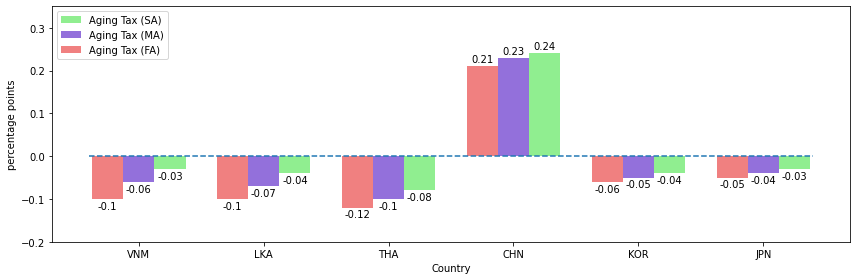

In [ ]:
# ==== Simul: Aging_Tax calculation ====
variable = 'k_hist'
labels = ['VNM','LKA','THA','CHN','KOR','JPN']

def aging_tax(country):
    sa = country.model_dict[country.get_model_name(country.slow_aging)][0].get(str(variable))[1]/country.model_dict[country.get_model_name(country.slow_aging)][0].get(str(variable))[0]
    fa = country.model_dict[country.get_model_name(country.fast_aging)][0].get(str(variable))[1]/country.model_dict[country.get_model_name(country.fast_aging)][0].get(str(variable))[0]
    na = country.model_dict[country.get_model_name(country.non_aging)][0].get(str(variable))[1]/country.model_dict[country.get_model_name(country.non_aging)][0].get(str(variable))[0]
    ma = country.model_dict[country.get_model_name(country.moderate_aging)][0].get(str(variable))[1]/country.model_dict[country.get_model_name(country.moderate_aging)][0].get(str(variable))[0]

    annual_sa = 100*(sa**(1/35)-1)
    annual_fa = 100*(fa**(1/35)-1)
    annual_na = 100*(na**(1/35)-1)
    annual_ma = 100*(ma**(1/35)-1)

    diff_fa = annual_fa - annual_na 
    diff_sa = annual_sa - annual_na
    diff_ma = annual_ma - annual_na
    return diff_fa, diff_sa, diff_ma

growth_tax_fa = [
    #round(aging_tax(pl)[0],2),
    round(aging_tax(vn)[0],2),
    round(aging_tax(lk)[0],2),
    round(aging_tax(tl)[0],2),
    round(aging_tax(cn)[0],2),
    round(aging_tax(kr)[0],2),
    round(aging_tax(jp)[0],2)
]

growth_tax_sa = [
    #round(aging_tax(pl)[1],2),
    round(aging_tax(vn)[1],2),
    round(aging_tax(lk)[1],2),
    round(aging_tax(tl)[1],2),
    round(aging_tax(cn)[1],2),
    round(aging_tax(kr)[1],2),
    round(aging_tax(jp)[1],2)
]

growth_tax_ma = [
    #round(aging_tax(pl)[2],2),
    round(aging_tax(vn)[2],2),
    round(aging_tax(lk)[2],2),
    round(aging_tax(tl)[2],2),
    round(aging_tax(cn)[2],2),
    round(aging_tax(kr)[2],2),
    round(aging_tax(jp)[2],2)
]

# Plotting
x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize = (12,4))
rects1 = ax.bar(x + 0.25, growth_tax_sa, width, color='lightgreen', label='Aging Tax (SA)')
rects3 = ax.bar(x, growth_tax_ma, width, color='mediumpurple', label='Aging Tax (MA)')
rects2 = ax.bar(x - 0.25, growth_tax_fa, width, color='lightcoral', label='Aging Tax (FA)')

ax.set_xlabel('Country')
ax.set_ylabel('percentage points')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='upper left')
ax.set_ylim(-0.2, 0.35)
ax.hlines(0, x[0]-0.4, x[len(x)-1]+0.4, linestyles='dashed')

ax.bar_label(rects1, padding=2)
ax.bar_label(rects2, padding=2)
ax.bar_label(rects3, padding=2)
fig.tight_layout()